In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
file_path = 'Resources/merged.csv'

df = pd.read_csv(file_path)
df.head(20)

,Unnamed: 0,Animal ID,Intake Type,Intake Condition,Breed,Color,Age_in_Years,Intactness,Sex,Age,...,out_Y_m_d,Sorted_Color,Length_of_Stay,Breed_update,Breed1,Breed2,AKC_group1,Size1,AKC_group2,Size2
0,0,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,6.0,Altered,Male,Adult,...,2014/03/08,Tricolor,2,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN
1,1,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,7.0,Altered,Male,Adult,...,2014/12/20,Liver/White,2,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN
2,2,A006100,Stray,Normal,Spinone Italiano Mix,Yellow/White,10.0,Altered,Male,Senior,...,2017/12/07,Sable/White,1,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN
3,3,A047759,Owner Surrender,Normal,Dachshund,Tricolor,10.0,Altered,Male,Senior,...,2014/04/07,Gray/Tan,6,Dachshund,Dachshund,NaN,hound,small,NaN,NaN
4,4,A134067,Public Assist,Injured,Shetland Sheepdog,Brown/White,16.0,Altered,Male,Senior,...,2013/11/16,Brown,1,Shetland Sheepdog,Shetland Sheepdog,NaN,herding,small,NaN,NaN
5,5,A141142,Stray,Aged,Labrador Retriever/Pit Bull,Black/White,15.0,Altered,Female,Senior,...,2013/11/17,Black,2,Labrador Retriever/Pit Bull,Labrador Retriever,Pit Bull,sporting,medium,pit bull,large
6,6,A163459,Stray,Normal,Miniature Schnauzer Mix,Black/Gray,15.0,Intact,Female,Senior,...,2014/11/14,Black/White,1,Miniature Schnauzer,Miniature Schnauzer,NaN,terrier,small,NaN,NaN
7,7,A165752,Stray,Normal,Lhasa Apso Mix,Brown/White,15.0,Altered,Male,Senior,...,2014/09/15,Tan,1,Lhasa Apso,Lhasa Apso,NaN,non-sporting,small,NaN,NaN
8,8,A178569,Public Assist,Normal,Shetland Sheepdog Mix,White/Black,15.0,Altered,Male,Senior,...,2014/03/23,Brown/White,7,Shetland Sheepdog,Shetland Sheepdog,NaN,herding,small,NaN,NaN
9,9,A189592,Stray,Normal,Shetland Sheepdog Mix,Brown/White,18.0,Altered,Female,Senior,...,2015/09/18,Tricolor,1,Shetland Sheepdog,Shetland Sheepdog,NaN,herding,small,NaN,NaN


In [3]:
df.columns

Index(['Unnamed: 0', 'Animal ID', 'Intake Type', 'Intake Condition', 'Breed',
       'Color', 'Age_in_Years', 'Intactness', 'Sex', 'Age', 'Breed_Type',
       'in_Y_m_d', 'Outcome Type', 'out_Y_m_d', 'Sorted_Color',
       'Length_of_Stay', 'Breed_update', 'Breed1', 'Breed2', 'AKC_group1',
       'Size1', 'AKC_group2', 'Size2'],
      dtype='object')

In [4]:
# Create column Multiple to determine true/false if animal ID is duplicated
df ['Duplicates'] = df.duplicated(subset='Animal ID', keep=False)

# Convert Multiple_Intakes to int that returns 0,1
df['Duplicates'] = df['Duplicates'].astype(int)

df.head()

,Unnamed: 0,Animal ID,Intake Type,Intake Condition,Breed,Color,Age_in_Years,Intactness,Sex,Age,...,Sorted_Color,Length_of_Stay,Breed_update,Breed1,Breed2,AKC_group1,Size1,AKC_group2,Size2,Duplicates
0,0,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,6.0,Altered,Male,Adult,...,Tricolor,2,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1
1,1,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,7.0,Altered,Male,Adult,...,Liver/White,2,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1
2,2,A006100,Stray,Normal,Spinone Italiano Mix,Yellow/White,10.0,Altered,Male,Senior,...,Sable/White,1,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1
3,3,A047759,Owner Surrender,Normal,Dachshund,Tricolor,10.0,Altered,Male,Senior,...,Gray/Tan,6,Dachshund,Dachshund,NaN,hound,small,NaN,NaN,0
4,4,A134067,Public Assist,Injured,Shetland Sheepdog,Brown/White,16.0,Altered,Male,Senior,...,Brown,1,Shetland Sheepdog,Shetland Sheepdog,NaN,herding,small,NaN,NaN,0


In [5]:
# Create counter column with each occurrence of the animal id
df['Multiple_Intakes'] = df.groupby('Animal ID').cumcount()+1
df.head(20)

,Unnamed: 0,Animal ID,Intake Type,Intake Condition,Breed,Color,Age_in_Years,Intactness,Sex,Age,...,Length_of_Stay,Breed_update,Breed1,Breed2,AKC_group1,Size1,AKC_group2,Size2,Duplicates,Multiple_Intakes
0,0,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,6.0,Altered,Male,Adult,...,2,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1,1
1,1,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,7.0,Altered,Male,Adult,...,2,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1,2
2,2,A006100,Stray,Normal,Spinone Italiano Mix,Yellow/White,10.0,Altered,Male,Senior,...,1,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1,3
3,3,A047759,Owner Surrender,Normal,Dachshund,Tricolor,10.0,Altered,Male,Senior,...,6,Dachshund,Dachshund,NaN,hound,small,NaN,NaN,0,1
4,4,A134067,Public Assist,Injured,Shetland Sheepdog,Brown/White,16.0,Altered,Male,Senior,...,1,Shetland Sheepdog,Shetland Sheepdog,NaN,herding,small,NaN,NaN,0,1
5,5,A141142,Stray,Aged,Labrador Retriever/Pit Bull,Black/White,15.0,Altered,Female,Senior,...,2,Labrador Retriever/Pit Bull,Labrador Retriever,Pit Bull,sporting,medium,pit bull,large,0,1
6,6,A163459,Stray,Normal,Miniature Schnauzer Mix,Black/Gray,15.0,Intact,Female,Senior,...,1,Miniature Schnauzer,Miniature Schnauzer,NaN,terrier,small,NaN,NaN,0,1
7,7,A165752,Stray,Normal,Lhasa Apso Mix,Brown/White,15.0,Altered,Male,Senior,...,1,Lhasa Apso,Lhasa Apso,NaN,non-sporting,small,NaN,NaN,0,1
8,8,A178569,Public Assist,Normal,Shetland Sheepdog Mix,White/Black,15.0,Altered,Male,Senior,...,7,Shetland Sheepdog,Shetland Sheepdog,NaN,herding,small,NaN,NaN,0,1
9,9,A189592,Stray,Normal,Shetland Sheepdog Mix,Brown/White,18.0,Altered,Female,Senior,...,1,Shetland Sheepdog,Shetland Sheepdog,NaN,herding,small,NaN,NaN,0,1


In [6]:
# Replace all 1's with 0
df['Multiple_Intakes'] = df['Multiple_Intakes'].replace([1],0)
df

,Unnamed: 0,Animal ID,Intake Type,Intake Condition,Breed,Color,Age_in_Years,Intactness,Sex,Age,...,Length_of_Stay,Breed_update,Breed1,Breed2,AKC_group1,Size1,AKC_group2,Size2,Duplicates,Multiple_Intakes
0,0,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,6.000000,Altered,Male,Adult,...,2,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1,0
1,1,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,7.000000,Altered,Male,Adult,...,2,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1,2
2,2,A006100,Stray,Normal,Spinone Italiano Mix,Yellow/White,10.000000,Altered,Male,Senior,...,1,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1,3
3,3,A047759,Owner Surrender,Normal,Dachshund,Tricolor,10.000000,Altered,Male,Senior,...,6,Dachshund,Dachshund,NaN,hound,small,NaN,NaN,0,0
4,4,A134067,Public Assist,Injured,Shetland Sheepdog,Brown/White,16.000000,Altered,Male,Senior,...,1,Shetland Sheepdog,Shetland Sheepdog,NaN,herding,small,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75986,75986,A850187,Stray,Normal,Labrador Retriever,Cream,0.008219,Unknown,NaN,Puppy,...,1,Labrador Retriever,Labrador Retriever,NaN,sporting,medium,NaN,NaN,0,0
75987,75987,A850188,Stray,Normal,Labrador Retriever,Cream,0.008219,Unknown,NaN,Puppy,...,1,Labrador Retriever,Labrador Retriever,NaN,sporting,medium,NaN,NaN,0,0
75988,75988,A850189,Stray,Normal,Labrador Retriever,Cream,0.008219,Unknown,NaN,Puppy,...,1,Labrador Retriever,Labrador Retriever,NaN,sporting,medium,NaN,NaN,0,0
75989,75989,A850190,Stray,Normal,Labrador Retriever,Cream,0.008219,Unknown,NaN,Puppy,...,1,Labrador Retriever,Labrador Retriever,NaN,sporting,medium,NaN,NaN,0,0


In [7]:
# Replace all values >=1 with 1
df['Multiple_Intakes'].where(df['Multiple_Intakes'] <= 1, 1, inplace=True)
df

,Unnamed: 0,Animal ID,Intake Type,Intake Condition,Breed,Color,Age_in_Years,Intactness,Sex,Age,...,Length_of_Stay,Breed_update,Breed1,Breed2,AKC_group1,Size1,AKC_group2,Size2,Duplicates,Multiple_Intakes
0,0,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,6.000000,Altered,Male,Adult,...,2,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1,0
1,1,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,7.000000,Altered,Male,Adult,...,2,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1,1
2,2,A006100,Stray,Normal,Spinone Italiano Mix,Yellow/White,10.000000,Altered,Male,Senior,...,1,Spinone Italiano,Spinone Italiano,NaN,sporting,large,NaN,NaN,1,1
3,3,A047759,Owner Surrender,Normal,Dachshund,Tricolor,10.000000,Altered,Male,Senior,...,6,Dachshund,Dachshund,NaN,hound,small,NaN,NaN,0,0
4,4,A134067,Public Assist,Injured,Shetland Sheepdog,Brown/White,16.000000,Altered,Male,Senior,...,1,Shetland Sheepdog,Shetland Sheepdog,NaN,herding,small,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75986,75986,A850187,Stray,Normal,Labrador Retriever,Cream,0.008219,Unknown,NaN,Puppy,...,1,Labrador Retriever,Labrador Retriever,NaN,sporting,medium,NaN,NaN,0,0
75987,75987,A850188,Stray,Normal,Labrador Retriever,Cream,0.008219,Unknown,NaN,Puppy,...,1,Labrador Retriever,Labrador Retriever,NaN,sporting,medium,NaN,NaN,0,0
75988,75988,A850189,Stray,Normal,Labrador Retriever,Cream,0.008219,Unknown,NaN,Puppy,...,1,Labrador Retriever,Labrador Retriever,NaN,sporting,medium,NaN,NaN,0,0
75989,75989,A850190,Stray,Normal,Labrador Retriever,Cream,0.008219,Unknown,NaN,Puppy,...,1,Labrador Retriever,Labrador Retriever,NaN,sporting,medium,NaN,NaN,0,0


array([[<AxesSubplot:title={'center':'Multiple_Intakes'}>]], dtype=object)

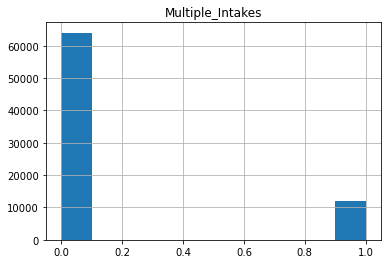

In [8]:
df.hist(column='Multiple_Intakes')

array([[<AxesSubplot:title={'center':'Length_of_Stay'}>]], dtype=object)

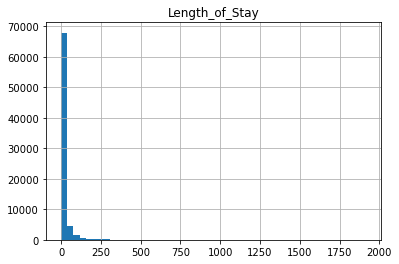

In [28]:
df.hist(column='Length_of_Stay', bins=50)

In [10]:
df['Length_of_Stay'].describe()

count    75991.000000
mean        18.794186
std         48.259882
min          1.000000
25%          3.000000
50%          6.000000
75%         13.000000
max       1914.000000
Name: Length_of_Stay, dtype: float64

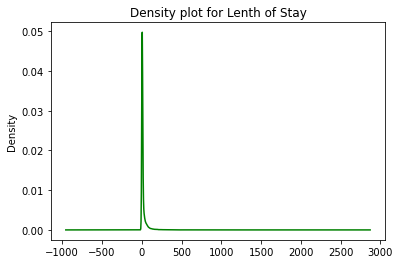

In [11]:
df.Length_of_Stay.plot.density(color='green')
plt.title('Density plot for Lenth of Stay')
plt.show()

<AxesSubplot:>

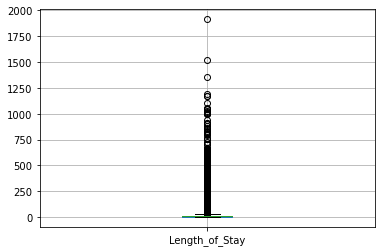

In [12]:
df.boxplot(column='Length_of_Stay')

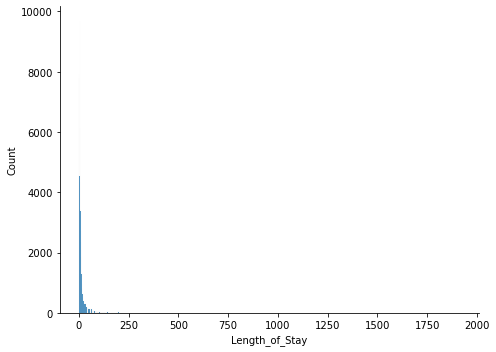

In [17]:
sn.displot(
  data=df,
  x="Length_of_Stay",
  kind="hist",
  aspect=1.4,
)

/Users/jordanthomas/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


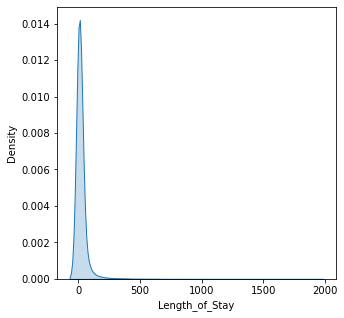

In [30]:
data = df.Length_of_Stay
plt.figure(figsize = (5,5))
sn.kdeplot(data , bw = 0.5 , fill = True)
plt.show()

In [33]:
df.columns

Index(['Unnamed: 0', 'Animal ID', 'Intake Type', 'Intake Condition', 'Breed',
       'Color', 'Age_in_Years', 'Intactness', 'Sex', 'Age', 'Breed_Type',
       'in_Y_m_d', 'Outcome Type', 'out_Y_m_d', 'Sorted_Color',
       'Length_of_Stay', 'Breed_update', 'Breed1', 'Breed2', 'AKC_group1',
       'Size1', 'AKC_group2', 'Size2', 'Duplicates', 'Multiple_Intakes'],
      dtype='object')

Text(0.5, 1.0, 'Length of Stay per Animal')

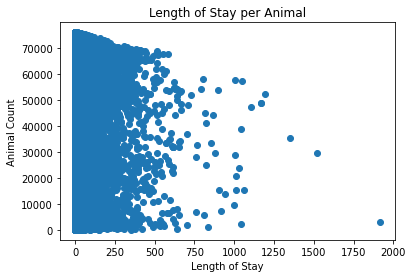

In [35]:
plt.scatter(df['Length_of_Stay'],df['Unnamed: 0'])
plt.xlabel('Length of Stay')
plt.ylabel('Animal Count')
plt.title('Length of Stay per Animal')

/Users/jordanthomas/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/jordanthomas/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


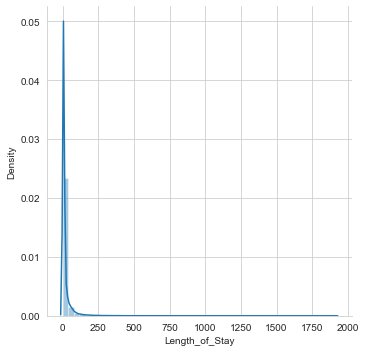

In [38]:
sn.FacetGrid(df,size=5).map(sn.distplot,'Length_of_Stay').add_legend()